<a href="https://colab.research.google.com/github/SRARNAB7/HDS_5230_07_Arnab/blob/main/Facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os
zip_path = "/content/archive (1).zip"
extract_path= "/content"
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

print(f"Files Extracted to:{extract_path}")

Files Extracted to:/content


In [2]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D,Input,Dense, Dropout




In [3]:
train_dir = "/content/train"
test_dir = "/content/test"

In [4]:
image_size=(48,48)
batch_size=64       #key hyperparameter, it refers to the no of training examples used in 1 iteration of updating the models weight

In [5]:
def count_images(dir):
  total_images= 0

  for sub_dir,_,files in os.walk(dir):
    total_images += len(files)

  return total_images

train_images= count_images(train_dir)
test_images= count_images(test_dir)

print(f"Total Training Images:{train_images}")
print(f"Total Testing Images:{test_images}")

Total Training Images:28709
Total Testing Images:7178


In [6]:
def count_images_per_dir(dir):

  for sub_dir,_,files in os.walk(dir):
    total_images = len(files)
    print(f"{sub_dir} contents:{total_images}")

print("Training set images count in each folder")
count_images_per_dir(train_dir)

print("Testing set images count in each folder")
count_images_per_dir(test_dir)


Training set images count in each folder
/content/train contents:0
/content/train/fear contents:4097
/content/train/angry contents:3995
/content/train/sad contents:4830
/content/train/neutral contents:4965
/content/train/surprise contents:3171
/content/train/disgust contents:436
/content/train/happy contents:7215
Testing set images count in each folder
/content/test contents:0
/content/test/fear contents:1024
/content/test/angry contents:958
/content/test/sad contents:1247
/content/test/neutral contents:1233
/content/test/surprise contents:831
/content/test/disgust contents:111
/content/test/happy contents:1774


In [7]:
#data augumentation for training
train_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [8]:
test_datagen= ImageDataGenerator(rescale=1./255) # 255 color combination

In [9]:
train_generator= train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode= 'grayscale',
    shuffle=True
)

Found 28709 images belonging to 7 classes.


In [10]:
test_generator= train_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode= 'grayscale',
    shuffle=True
)

Found 7178 images belonging to 7 classes.


Data print from the folders with labesl label code sample image with type and code class code 6 label photo print VGG16 model


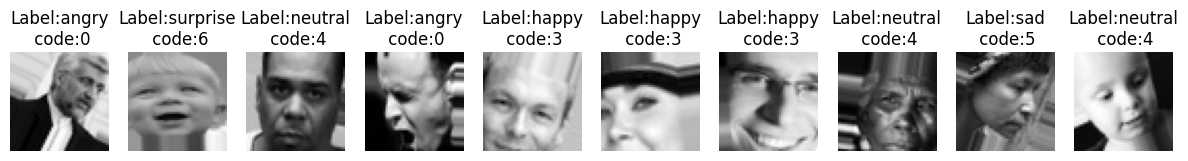

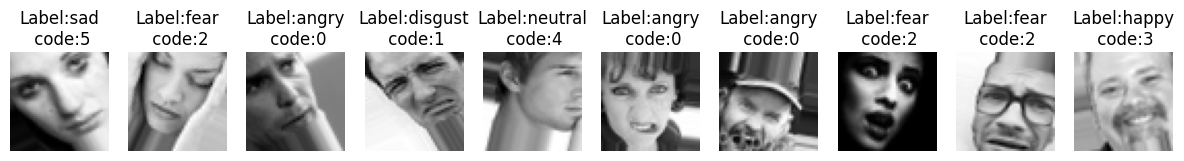

In [11]:
def plot_sample_data(generator,number_samples=10):
  images,labels= next(generator)

  class_indices= generator.class_indices
  #print("Class Indices:",class_indices)
  class_names= list(class_indices.keys())
  #print("Class Names:",class_names)

  plt.figure(figsize=(15,15))

  for i in range(number_samples):
    plt.subplot(1,number_samples,i+1)
    plt.imshow(images[i].reshape(image_size[0],image_size[1]),cmap='grey') # first convert then give color
    label_index= np.argmax(labels[i]) # argmax func returns indices of the max element of the array
    #print(label_index)
    label_name= class_names[label_index]
    plt.title(f'Label:{label_name}\n code:{label_index}')
    plt.axis('off')
  plt.show()

plot_sample_data(train_generator)
plot_sample_data(test_generator)



In [12]:
from keras.optimizers import Adam
#Define Model
pretrained_model= VGG16(weights=None, include_top= False, input_shape= (48,48,1))# in one channel since in gral scale only
#Adding custom layers on top
layers= pretrained_model.output
layers= GlobalAveragePooling2D()(layers)
layers= Dense(256,activation='relu')(layers) # 256 no of neurons, relu for non linear
layers= Dropout(0.5)(layers)

prediction = Dense(7,activation='softmax')(layers) #7 neurons since 7 class and softmax when multiclass classification

model_vgg16= Model(inputs=pretrained_model.input,outputs=prediction)
model_vgg16.compile(optimizer= Adam(learning_rate= 0.001),loss= 'categorical_crossentropy', metrics= ['accuracy'])
model_vgg16.summary()




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,3

 Total params: 14,846,663 (56.64 MB)

 Trainable params: 14,846,663 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history_vgg16= model_vgg16.fit(
    train_generator,
    steps_per_epoch= train_generator.samples // batch_size,
    validation_data=  test_generator,
    validation_steps = test_generator.samples // batch_size,
    epochs = 50
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 65s 109ms/step - accuracy: 0.2304 - loss: 1.8661 - val_accuracy: 0.2471 - val_loss: 1.8165
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 32s 72ms/step - accuracy: 0.2188 - loss: 1.8900

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.2188 - loss: 1.8900 - val_accuracy: 0.2468 - val_loss: 1.8163
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 82s 145ms/step - accuracy: 0.2532 - loss: 1.8158 - val_accuracy: 0.2471 - val_loss: 1.8144
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2188 - loss: 1.7863 - val_accuracy: 0.2469 - val_loss: 1.8140
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.2544 - loss: 1.8143 - val_accuracy: 0.2469 - val_loss: 1.8137
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.2188 - loss: 1.8421 - val_accuracy: 0.2471 - val_loss: 1.8139
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 76s 88ms/step - accuracy: 0.2519 - loss: 1.8139 - val_accuracy: 0.2471 - val_loss: 1.8129
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.2188 - loss: 1.8031 - val_accuracy: 0.2475 - val_loss: 1.8128
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.2492 - loss: 1.8135 - val_accuracy: 